## Muat <i>libraries</i>

In [1]:
import pandas as pd
import mysql.connector as mysql

## Sambungkan ke <i>database</i> yang telah dibuat tadi

In [2]:
koneksi = mysql.connect(host='localhost',
                        database='JoJo',
                        user='root', 
                        password='Rakhid@16')

## Lihat tabel jurusan

In [3]:
cursor = koneksi.cursor()
cursor.execute("SELECT * from jurusan")

tabel_jurusan = cursor.fetchall()
tabel_jurusan

[(1, 'informatika'),
 (2, 'mesin'),
 (3, 'kimia'),
 (4, 'statistika'),
 (5, 'matematika'),
 (6, 'geologi')]

## Ubah ke dalam DataFrame

In [4]:
data_jurusan = pd.DataFrame(columns=['ID', "Nama Jurusan"],
                            data = tabel_jurusan)

data_jurusan = data_jurusan.set_index('ID')
data_jurusan

,Nama Jurusan
ID,
1,informatika
2,mesin
3,kimia
4,statistika
5,matematika
6,geologi


## Kita ubah sedikit datanya

In [5]:
data_jurusan['Nama Jurusan'] = data_jurusan['Nama Jurusan'].str.capitalize()
data_jurusan

,Nama Jurusan
ID,
1,Informatika
2,Mesin
3,Kimia
4,Statistika
5,Matematika
6,Geologi


## Lihat data tabel mahasiswa

In [6]:
cursor = koneksi.cursor()
cursor.execute("SELECT * from mahasiswa")

tabel_mahasiswa = cursor.fetchall()
tabel_mahasiswa

[(1, 1, 'tommy', ' 10 maret 2000', 5165432, 'madura'),
 (2, 1, 'wahid', '20 mei 2000', 216543, 'sidoarjo'),
 (3, 1, 'ali kharozim', '03 januari 2000', 16543, 'pacitan'),
 (4, 2, 'hanif', '10 agustus 2000', 16546, 'boyolali'),
 (5, 3, 'yudha', '09 november 2000', 216546, 'magetan'),
 (6, 4, 'zain', '25 desember 2000', 16546, 'surabaya'),
 (7, 5, 'aji', '06 oktober 2000', 16546, 'gresik'),
 (8, 6, 'sumiati', '17 februari 2000', 16546, 'klaten'),
 (9, 1, 'romi', '18 april 2000', 16546, 'magelang'),
 (10, 2, 'ridho', '19 mei 2000', 56164, 'bangkalan'),
 (11, 6, 'fincent', '26 februari 2001', 21654, 'arosbaya'),
 (12, 1, 'darul', '17 september 2001', 21563, 'blega'),
 (13, 3, 'ulum', '14 februari 1999', 2654, 'kamal'),
 (14, 5, 'simbah', '19 april 2000', 16464, 'jakarta'),
 (15, 3, 'logitech', '12 desember 2012', 16544, 'surabaya'),
 (16, 2, 'mastekno', '31 desember 2012', 15654, 'jogja'),
 (17, 4, 'lentik', '29 oktober 2000', 215664, 'surakarta'),
 (18, 5, 'math heri', '18 juni 2000', 5562

## Ubah ke dalam DataFrame

In [7]:
data_mahasiswa = pd.DataFrame(columns=["ID", "ID_Jurusan", "Nama", "Tanggal lahir", "No Tel", "Alamat"],
                              data = tabel_mahasiswa)
                              
data_mahasiswa = data_mahasiswa.set_index("ID")
data_mahasiswa

,ID_Jurusan,Nama,Tanggal lahir,No Tel,Alamat
ID,,,,,
1,1,tommy,10 maret 2000,5165432,madura
2,1,wahid,20 mei 2000,216543,sidoarjo
3,1,ali kharozim,03 januari 2000,16543,pacitan
4,2,hanif,10 agustus 2000,16546,boyolali
5,3,yudha,09 november 2000,216546,magetan
6,4,zain,25 desember 2000,16546,surabaya
7,5,aji,06 oktober 2000,16546,gresik
8,6,sumiati,17 februari 2000,16546,klaten
9,1,romi,18 april 2000,16546,magelang


## Visualisasikan sedikit datanya

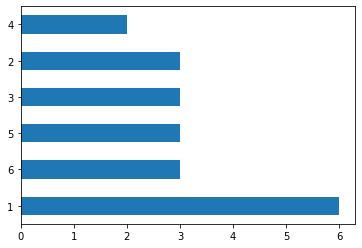

In [8]:
data_mahasiswa['ID_Jurusan'].value_counts().plot(kind='barh')

## JOIN TABLE

In [9]:
cursor = koneksi.cursor()

cursor.execute("select mahasiswa.id_mhs, jurusan.nama_jurusan, mahasiswa.nama_mhs, mahasiswa.tgl_lahir" +
               " from mahasiswa inner join jurusan on jurusan.id_jurusan = mahasiswa.id_jurusan " +
               "order by mahasiswa.id_mhs")

tabel_baru = cursor.fetchall()
tabel_baru

[(1, 'informatika', 'tommy', ' 10 maret 2000'),
 (2, 'informatika', 'wahid', '20 mei 2000'),
 (3, 'informatika', 'ali kharozim', '03 januari 2000'),
 (4, 'mesin', 'hanif', '10 agustus 2000'),
 (5, 'kimia', 'yudha', '09 november 2000'),
 (6, 'statistika', 'zain', '25 desember 2000'),
 (7, 'matematika', 'aji', '06 oktober 2000'),
 (8, 'geologi', 'sumiati', '17 februari 2000'),
 (9, 'informatika', 'romi', '18 april 2000'),
 (10, 'mesin', 'ridho', '19 mei 2000'),
 (11, 'geologi', 'fincent', '26 februari 2001'),
 (12, 'informatika', 'darul', '17 september 2001'),
 (13, 'kimia', 'ulum', '14 februari 1999'),
 (14, 'matematika', 'simbah', '19 april 2000'),
 (15, 'kimia', 'logitech', '12 desember 2012'),
 (16, 'mesin', 'mastekno', '31 desember 2012'),
 (17, 'statistika', 'lentik', '29 oktober 2000'),
 (18, 'matematika', 'math heri', '18 juni 2000'),
 (19, 'informatika', 'august', '17 agustus 2000 '),
 (20, 'geologi', 'gempur sari', '18 juli 2000')]

## Buat TABLE baru

In [10]:
cursor.execute('DROP TABLE IF EXISTS mhs_baru')
cursor.execute("CREATE TABLE mhs_baru (id_mhs_baru INT(11) NOT NULL, nama_jurusan VARCHAR(30) NOT NULL," +
               " nama_mhs VARCHAR(30) NOT NULL, tanggal_lahir VARCHAR(20) NOT NULL)")

## Masukan data hasil JOINAN ke TABLE baru

In [11]:
for baris in tabel_baru:
    sql = "INSERT INTO JoJo.mhs_baru VALUES (%s,%s,%s,%s)"
    cursor.execute(sql, baris)
    print(tuple(baris), "Telah dimasukkan")
    koneksi.commit()

(1, 'informatika', 'tommy', ' 10 maret 2000') Telah dimasukkan
(2, 'informatika', 'wahid', '20 mei 2000') Telah dimasukkan
(3, 'informatika', 'ali kharozim', '03 januari 2000') Telah dimasukkan
(4, 'mesin', 'hanif', '10 agustus 2000') Telah dimasukkan
(5, 'kimia', 'yudha', '09 november 2000') Telah dimasukkan
(6, 'statistika', 'zain', '25 desember 2000') Telah dimasukkan
(7, 'matematika', 'aji', '06 oktober 2000') Telah dimasukkan
(8, 'geologi', 'sumiati', '17 februari 2000') Telah dimasukkan
(9, 'informatika', 'romi', '18 april 2000') Telah dimasukkan
(10, 'mesin', 'ridho', '19 mei 2000') Telah dimasukkan
(11, 'geologi', 'fincent', '26 februari 2001') Telah dimasukkan
(12, 'informatika', 'darul', '17 september 2001') Telah dimasukkan
(13, 'kimia', 'ulum', '14 februari 1999') Telah dimasukkan
(14, 'matematika', 'simbah', '19 april 2000') Telah dimasukkan
(15, 'kimia', 'logitech', '12 desember 2012') Telah dimasukkan
(16, 'mesin', 'mastekno', '31 desember 2012') Telah dimasukkan
(17, 's

## Lihat isi TABLE baru dalam bentuk DataFrame

In [12]:
cursor = koneksi.cursor()
cursor.execute("select * from mhs_baru")

mhs_baru = cursor.fetchall()
mhs_baru

data_mahasiswa_baru = pd.DataFrame(columns=["ID", "Nama Jurusan", "Nama", "Tanggal lahir"],
                              data = mhs_baru)
                              
data_mahasiswa_baru = data_mahasiswa_baru.set_index("ID")
data_mahasiswa_baru

,Nama Jurusan,Nama,Tanggal lahir
ID,,,
1,informatika,tommy,10 maret 2000
2,informatika,wahid,20 mei 2000
3,informatika,ali kharozim,03 januari 2000
4,mesin,hanif,10 agustus 2000
5,kimia,yudha,09 november 2000
6,statistika,zain,25 desember 2000
7,matematika,aji,06 oktober 2000
8,geologi,sumiati,17 februari 2000
9,informatika,romi,18 april 2000


## Visualisasikan lagi datanya

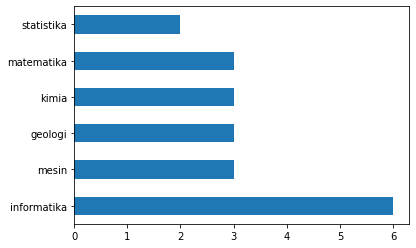

In [13]:
data_mahasiswa_baru['Nama Jurusan'].value_counts().plot(kind='barh')